/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is dep

Dataset loaded successfully:
             ID    Q5TA01    P25713    O94856    P04075    Q9UHC6     Q13449  \
0  TMT6_b7.131C  5.168959  6.735471  8.997582  8.058283  4.849077  10.201357   
1  TMT6_b7.129N  5.182971  6.869710  9.025813  8.348175  5.620623  10.444132   
2  TMT6_b7.128N  5.264305  6.631754  8.953134  8.339290  5.156989  10.379178   
3  TMT6_b7.130C  5.020431  6.792790  9.032584  8.083382  5.558384  10.144958   
4  TMT6_b7.129C  5.430227  6.724379  8.991610  8.170747  4.990067  10.082130   

     K7ELW0    P63104    I3L333  ...    Q8IW52    P16519    Q9Y279    O60279  \
0  5.515370  5.305928  5.902207  ...  6.523675  5.196001  3.987374  7.093147   
1  5.897145  5.871425  5.553518  ...  6.723668  5.009814  4.362485  7.153841   
2  5.822230  5.717783  5.405671  ...  6.692565  5.006826  3.568345  6.832322   
3  5.579901  5.289870  5.763870  ...  6.177610  5.226203  2.932482  6.967345   
4  5.993094  5.816386  5.797303  ...  6.353249  5.127686  3.879961  7.335284   

     O435

/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/scib/metrics/graph_connectivity.py:56: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(labels)
/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/scib/metrics/graph_connectivity.py:56: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(labels)
/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/scib/metrics/graph_connectivity.py:56: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_count

mean silhouette per group: nan


/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


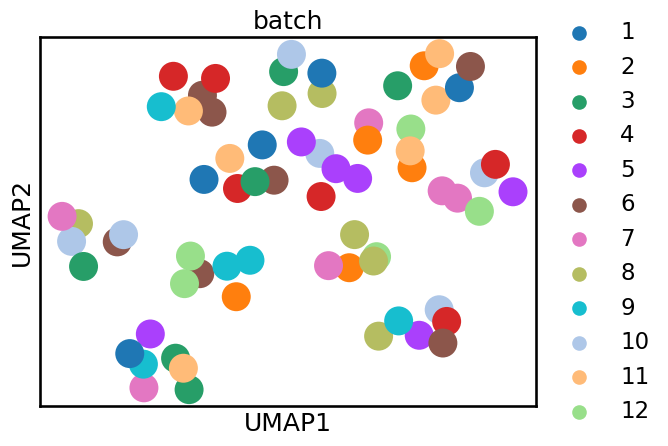

/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/anaconda3/envs/new_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


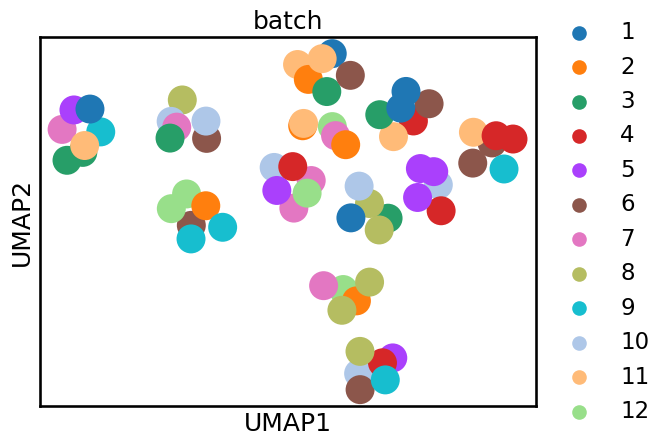

Graph Connectivity : 0.7492063492063492
Batch ASW : nan
PCR score : 0.8227643341040413


In [1]:
import scanpy as sc
import anndata
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scib.metrics import silhouette_batch as sb
import scib
from scib.metrics import pcr_comparison as pcr
from scib.metrics import graph_connectivity as gc
from scib.integration import combat
from scib.preprocessing import hvg_intersect


# File path
file_path = "/Users/emirhanyagmur/Desktop/CSF/TMT clean/TRANSPOSED/syn20933797_cohort2_TMT_proteomics_3_clean_transposed.csv"
# Load dataset
dataset = pd.read_csv(file_path)



# Check for empty DataFrame and print the first few rows
if dataset.empty:
    raise ValueError("Dataset is empty.")
print("Dataset loaded successfully:")
print(dataset.head())

# Assign 'Batch' column from batch_info to dataset as a row named 'batch'
batch_info_path = "/Users/emirhanyagmur/Desktop/CSF/TMT/syn20933797_cohort2_clinical_CSF.csv"
batch_info = pd.read_csv(batch_info_path)
batch_info.set_index(batch_info.columns[0], inplace=True)

# Create an AnnData object from the dataset
combined = anndata.AnnData(X=dataset.iloc[:, 1:].values, var=pd.DataFrame(index=dataset.columns[1:]), obs=pd.DataFrame(index=dataset['ID']))

# Drop the 'group' column from combined.obs if it exists

    
combined.obs['batch'] = batch_info['org_batch'].values

# Check the datatype of the combined object and its attributes
print("Type of combined:", type(combined))
print("Type of combined.X:", type(combined.X))

# Convert 'batch' column to categorical dtype
combined.obs['batch'] = combined.obs['batch'].astype('category')

# Convert 'batch' column to string dtype
combined.obs['batch'] = combined.obs['batch'].astype(str)

# Ensure the data in the combined object is numeric
combined.X = combined.X.astype(float)

# Perform batch correction using Combat
combined_corrected = scib.integration.combat(combined, 'batch')

combined_corrected_df = pd.DataFrame(combined_corrected.X, index=combined_corrected.obs.index, columns=combined_corrected.var.index)
  
combined_corrected_df.to_csv('/Users/emirhanyagmur/Desktop/CSF/TMT batch/intradone/syn20933797_cohort2_TMT_proteomics_3_intradone.csv')

print(combined_corrected_df.head())

# Evaluate the correction using metrics
sc.tl.pca(combined_corrected, n_comps=10)
sc.pp.neighbors(combined_corrected, n_neighbors=30)
sc.tl.umap(combined_corrected)
 # Set perplexity to a value less than the number of samples

sc.tl.pca(combined,n_comps=10)
sc.pp.neighbors(combined,n_neighbors=30) 
# Convert 'batch' column to categorical dtype
combined_corrected.obs['batch'] = combined_corrected.obs['batch'].astype('category')

sc.tl.umap(combined)   

# Graph Connectivity
graph_conn = scib.metrics.graph_connectivity(combined_corrected, label_key="batch")  

# Batch ASW
batch_asw = scib.metrics.silhouette_batch(combined_corrected, batch_key="batch", label_key="batch", embed="X_pca")     

# PCR score
pcr_score = scib.metrics.pcr_comparison(combined, combined_corrected, covariate="batch")

sc.pl.umap(combined_corrected, color='batch')

sc.pl.umap(combined, color='batch')

# Print scaled metrics
print(f"Graph Connectivity : {graph_conn}")
print(f"Batch ASW : {batch_asw}")
print(f"PCR score : {pcr_score}")